In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
wine = pd.read_csv('winedata.csv', delimiter = ';',error_bad_lines=False) #Reads csv file into dataframe.

b'Skipping line 3149: expected 12 fields, saw 13\nSkipping line 4821: expected 12 fields, saw 13\n'


In [3]:
#Displaying wine information.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4891 non-null object
citric acid             4843 non-null object
residual sugar          4886 non-null object
chlorides               4890 non-null object
free sulfur dioxide     4888 non-null object
total sulfur dioxide    4889 non-null object
density                 4890 non-null object
pH                      4890 non-null object
sulphates               4892 non-null object
alcohol                 4890 non-null object
quality                 4892 non-null object
dtypes: float64(1), object(11)
memory usage: 459.1+ KB


In [4]:
#displaying 5 values for the dataset.
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.9940000000000001,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.057999999999999996,47.0,186.0,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.057999999999999996,47.0,186.0,0.9956,3.19,0.4,9.9,6


In [5]:
wine.isna().sum()

fixed acidity            5
volatile acidity         5
citric acid             53
residual sugar          10
chlorides                6
free sulfur dioxide      8
total sulfur dioxide     7
density                  6
pH                       6
sulphates                4
alcohol                  6
quality                  4
dtype: int64

In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4891 non-null object
citric acid             4843 non-null object
residual sugar          4886 non-null object
chlorides               4890 non-null object
free sulfur dioxide     4888 non-null object
total sulfur dioxide    4889 non-null object
density                 4890 non-null object
pH                      4890 non-null object
sulphates               4892 non-null object
alcohol                 4890 non-null object
quality                 4892 non-null object
dtypes: float64(1), object(11)
memory usage: 459.1+ KB


Task 1:
1) There are 4896 wines in the dataset
2) No not all the wines are unique. But 3867 wines are unique after deleting the duplicate and rubbish data.
3) 120 are missing values
4) The scale of the different attributes are not equal.

Task 2 Starts

In [14]:
#Replacing the high low with null values
wine = wine.replace({'high': None})
wine = wine.replace({'low': None})

In [8]:
wine.isna().any()

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool

In [9]:
wine = wine.dropna()

In [10]:
wine.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [12]:
wine = wine.drop_duplicates()
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.9940000000000001,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.057999999999999996,47.0,186.0,0.9956,3.19,0.4,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044000000000000004,28.0,129.0,0.9938,3.22,0.45,11.0,6
10,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
11,8.6,0.23,0.4,4.2,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
12,7.9,0.18,0.37,1.2,0.04,16.0,75.0,0.992,3.18,0.63,10.8,5
13,6.6,0.16,0.4,1.5,0.044000000000000004,48.0,143.0,0.9912,3.54,0.52,12.4,7


In [13]:
wine['quality'].value_counts()

6    1748
5    1140
7     668
4     150
8     129
3      19
        8
9       5
Name: quality, dtype: int64

In [ ]:
wine.info()

In [23]:
#Visualising the data and plotting the histograms for attributes.
wine['chlorides'] = wine['chlorides'].astype(float)
wine['volatile acidity'] = wine['volatile acidity'].astype(float)
wine['citric acid'] = wine['citric acid'].astype(float)
wine['residual sugar'] = wine['residual sugar'].astype(float)
wine['free sulfur dioxide'] = wine['free sulfur dioxide'].astype(float)
wine['total sulfur dioxide'] = wine['total sulfur dioxide'].astype(float)
wine['density'] = wine['density'].astype(float)
wine['pH'] = wine['pH'].astype(float)
wine['sulphates'] = wine['sulphates'].astype(float)
wine['alcohol'] = wine['alcohol'].astype(float)
wine['quality'] = wine['quality'].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B023C96D8>,
      dtype=object)

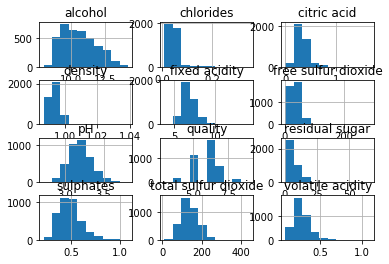

In [24]:
#Plotting histograms for 10 attributes
wine.hist()

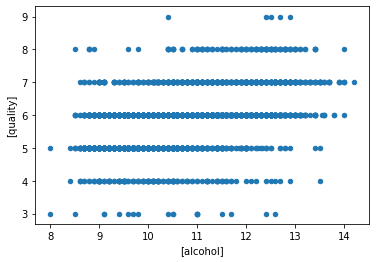

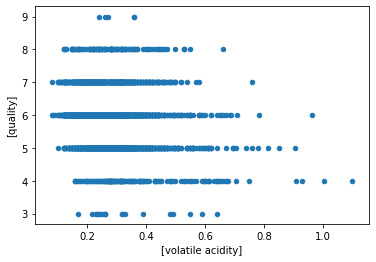

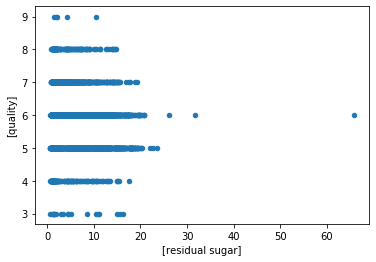

In [42]:
#scatter plot to show the relationship between the 3 attributes and the quality.

wine.plot(['alcohol'],['quality'], kind = 'scatter')

wine.plot(['volatile acidity'],['quality'], kind = 'scatter')

wine.plot(['residual sugar'],['quality'], kind = 'scatter')

Task 2
1) The frequency histograms are being ploted above for the various attributes in the dataset. In all those histograms I can observe is that there is a sudden rise in the values and then slowly gradually the values are decreasing. In other words the graphs have sudden rise giving a peak value.

2) To predict the quality of the wine, I have plotted three attributes which predicted the best to justify that the prediction is right.

In [25]:
f1 = ['alcohol', 'volatile acidity', 'residual sugar']
f2 = ['quality']
X = wine[f1]
y = wine[f2]
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state = 0)


In [26]:
train_X = train_X.fillna(train_X.mean())
train_y = train_y.fillna(train_y.mean())

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
import numpy as np

In [31]:
predictionY = lr.predict(train_X)
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(train_y, predictionY))

0.5860385220830645


Task 3
1) Rmse value is: 0.5860385220830645
2) Regression is all about predicting a quantity out of the data whereas, classification is predicting a label so in this problem we cannot apply classification as we need to find out the quality and quantity of the wine. So regression being the 


In [32]:
#Task 6

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
c =  DecisionTreeRegressor();
c.fit(train_X, train_y)
preY = lr.predict(train_X)
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(train_y, preY))

0.5860385220830645


In [33]:
#Task 4

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=3)
train_y_encoded = train_y.astype('int')
n.fit(train_X, train_y_encoded)
pY = lr.predict(train_X)
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(train_y_encoded, pY))

0.5872954623572644


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

Text(0, 0.5, 'Mean-Error')

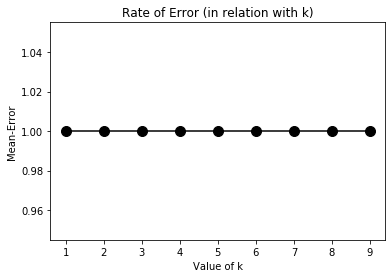

In [44]:
error = []

# Calculating error for K values between 1 and 10
for index in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = index)
    knn.fit(train_X, train_y_encoded)
    pre = knn.predict(train_X)
    error.append(np.mean(pre != pY))
import matplotlib.pyplot as plt

plt.plot(range(1, 10), error, color='black', linestyle='solid', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Rate of Error (in relation with k)')
plt.xlabel('Value of k')
plt.ylabel('Mean-Error')

Task 4
2) A plot of the results, showing some combination of actual quality, predicted quality and/or errors.